# Part 4

## Visualize after batch correstion

### load data

In [1]:
library(ggplot2)
library(data.table) #to read gz file

In [2]:
# load cell_relabelling 

cell_relabelling <- read.csv(file = "additional_input_files/cell_relabelling.csv"
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

'data.frame':	40 obs. of  9 variables:
 $ cell_type_original    : chr  "B" "CD10+ B cells" "CD20+ B cells" "ProB" ...
 $ cell_type             : chr  "B" "B" "B" "B" ...
 $ source                : chr  "van Galen et al., 2019" "Oetjen et al., 2018" "Oetjen et al., 2018" "van Galen et al., 2019" ...
 $ cell_type_color       : chr  "green" "green" "green" "green" ...
 $ cell_type_color_hex   : chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
 $ cell_type_shape       : int  12 12 12 12 13 13 13 13 13 13 ...
 $ cell_subtype          : chr  "B" "B" "B" "B" ...
 $ cell_subtype_color    : chr  "green" "green" "green" "green" ...
 $ cell_subtype_color_hex: chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
NULL


In [3]:
# # load counts

counts_corrected <- fread("counts_corr.csv.gz", header = TRUE)
print(head(str(counts_corrected)))
print(head(rownames(counts_corrected)))
rownames(counts_corrected) <- counts_corrected$gene_symbol
print(head(rownames(counts_corrected)))
counts_corrected <- counts_corrected[,-1]
counts_corrected <- as.data.frame(counts_corrected)
head(colnames(counts_corrected))

Classes ‘data.table’ and 'data.frame':	12485 obs. of  74584 variables:
 $ gene_symbol            : chr  "A1BG" "A1BG-AS1" "A2M-AS1" "A4GALT" ...
 $ AML1012-D0_AAAAAGTTACGT: num  0.03236 0.00341 0.0019 -0.00154 0.00565 ...
 $ AML1012-D0_AAAACACCAATC: num  0.0632 0.00367 0.00606 0.00265 0.02014 ...
 $ AML1012-D0_AAAATAGCCTTT: num  0.01192 0.00545 0.0072 -0.00149 0.01288 ...
 $ AML1012-D0_AAACATTAAACG: num  0.14074 0.01313 0.00681 -0.00167 0.01139 ...
 $ AML1012-D0_AAACCACGTGCN: num  0.08601 0.001354 -0.000301 0.004807 0.008856 ...
 $ AML1012-D0_AAACGCTGGAAN: num  0.07267 0.00209 0.00378 0.00264 0.01749 ...
 $ AML1012-D0_AAACTGGTACTA: num  0.04825 0.00698 0.00129 0.00441 0.00424 ...
 $ AML1012-D0_AAACTTGCCCGT: num  0.10351 0.00211 0.00481 0.00484 0.02307 ...
 $ AML1012-D0_AAATGAAAGTCC: num  0.04366 0.00309 0.00707 0.00484 0.01954 ...
 $ AML1012-D0_AAATGTACGGTA: num  0.0386 0.00311 0.00279 0.00813 0.01409 ...
 $ AML1012-D0_AACAATGGTGTG: num  0.0826 0.00185 0.00968 0.00311 0.01459 ...
 $ AM

[1] "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC"
[3] "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG"
[5] "AML1012-D0_AAACCACGTGCN" "AML1012-D0_AAACGCTGGAAN"

In [4]:
# load cell annotation

anno_cells <- read.table("anno_cells_corr.txt"
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

'data.frame':	74583 obs. of  37 variables:
 $ cell_ID.1                     : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : chr  "False" "True" "True" "True" ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "case" "case" "case" "case" ...
 $ day                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cell_type                     : chr

In [5]:
# load sample annotation

anno_samples <- read.table("anno_samples_corr.txt"
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
)
print(str(anno_samples))

'data.frame':	33 obs. of  15 variables:
 $ sample_ID                    : chr  "AML1012-D0" "AML210A-D0" "AML328-D0" "AML419A-D0" ...
 $ patient_ID                   : chr  "AML1012" "AML210A" "AML328" "AML419A" ...
 $ dataset                      : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                       : chr  "F" "M" "F" "F" ...
 $ age                          : int  32 67 74 54 58 70 26 57 42 52 ...
 $ health_status                : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control              : chr  "case" "case" "case" "case" ...
 $ day                          : num  0 0 0 0 0 0 0 0 0 NA ...
 $ nr_cells_raw                 : int  1136 748 1094 1189 485 2328 1586 933 3813 108 ...
 $ nr_cells_cf                  : int  951 640 965 1091 399 2196 1410 869 3574 93 ...
 $ nr_cells_cf_ctf              : int  946 603 909 1086 388 2186 1407 868 3504 93 ...
 $ total_counts_raw_cf_ctf_gf   : int  2060373 1530216 2367765 2783381 968844 5957569 4255900 1823

In [6]:
# load gene annotation

anno_genes <- read.table("anno_genes_corr.txt"
                           ,sep = "\t"
                           ,row.names = 1
                           ,header = TRUE
)
print(str(anno_genes))

'data.frame':	12485 obs. of  11 variables:
 $ gene_symbol.1                        : chr  "A1BG" "A1BG-AS1" "A2M-AS1" "A4GALT" ...
 $ is_in_LR_database                    : chr  "False" "False" "False" "False" ...
 $ isLigand                             : chr  "False" "False" "False" "False" ...
 $ isReceptor                           : chr  "False" "False" "False" "False" ...
 $ sum_pseudobulkCellType_expr          : num  40.76 1.67 2.74 10.86 18.2 ...
 $ sum_pseudobulkCellType_expr_threshold: int  1 1 1 1 1 1 1 1 1 1 ...
 $ sum_pseudobulkCellType_expr_filter   : chr  "True" "True" "True" "True" ...
 $ highly_variable                      : chr  "False" "False" "False" "True" ...
 $ means                                : num  0.1026 0.0055 0.0172 0.0162 0.03 ...
 $ dispersions                          : num  -3.19 -6.06 -3.28 -1.3 -2.73 ...
 $ dispersions_norm                     : num  0.197 -1.983 0.124 1.632 0.547 ...
NULL


In [7]:
# variables ####
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data

In [8]:
# check if booleans are stored correctly in teh anno_genes file
if(class(anno_genes$isLigand) == "character"){
  anno_genes$isLigand <- as.logical(toupper(anno_genes$isLigand))
}

if(class(anno_genes$isReceptor) == "character"){
  anno_genes$isReceptor <- as.logical(toupper(anno_genes$isReceptor))
}

### visualize

In [9]:
#construct pseudo bulks for cell types 

cell_type_IDs <- unique(anno_cells$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts_corrected)
                                                    ,ncol = length(cell_type_IDs)
  )
  )

i <- 1
for(cell_type_ID in cell_type_IDs){
#     print(cell_type_ID)

    idx_cell_type_ID <- anno_cells$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID)==0){
        counts_pseudobulkCellType[,i] <- 0
    } else if(sum(idx_cell_type_ID)==1){
        counts_pseudobulkCellType[,i] <- counts_corrected[,idx_cell_type_ID]
    } else {
        counts_pseudobulkCellType[,i] <- rowMeans(counts_corrected[,idx_cell_type_ID])
    }
        i <- i+1
    }

colnames(counts_pseudobulkCellType) <- cell_type_IDs
rownames(counts_pseudobulkCellType) <- rownames(counts_corrected)
print(str(counts_pseudobulkCellType))

'data.frame':	12485 obs. of  193 variables:
 $ HSPC_AML1012-D0: num  0.05548 0.003 0.00267 0.00283 0.01263 ...
 $ Mono_AML1012-D0: num  0.1508 0.00773 0.00619 0.00183 0.01504 ...
 $ DC_AML1012-D0  : num  0.08521 0.0024 0.00578 0.00454 0.01724 ...
 $ Ery_AML1012-D0 : num  0.127 0.0116 0.0133 0.0497 0.0665 ...
 $ T_AML1012-D0   : num  0.08722 0.00484 0.01588 0.0036 0.01727 ...
 $ B_AML210A-D0   : num  0.115304 0.006141 0.00681 0.000501 0.020127 ...
 $ Mono_AML210A-D0: num  0.14685 0.00914 0.00916 0.00258 0.01723 ...
 $ DC_AML210A-D0  : num  0.053478 0.008281 0.006143 0.000333 0.033846 ...
 $ Ery_AML210A-D0 : num  0.09164 0.01019 0.00969 0.08447 0.1065 ...
 $ HSPC_AML210A-D0: num  0.05359 0.00575 0.00766 0.00236 0.02058 ...
 $ T_AML210A-D0   : num  0.07276 0.00479 0.01417 0.00267 0.01863 ...
 $ HSPC_AML328-D0 : num  0.10848 0.00598 0.02126 0.01146 0.03492 ...
 $ T_AML328-D0    : num  0.07832 0.00394 0.02124 0.0049 0.02082 ...
 $ Mono_AML328-D0 : num  0.119341 0.009499 0.007011 0.000393 0.

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  3.04 3.12 3.05 3.1 3.06 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


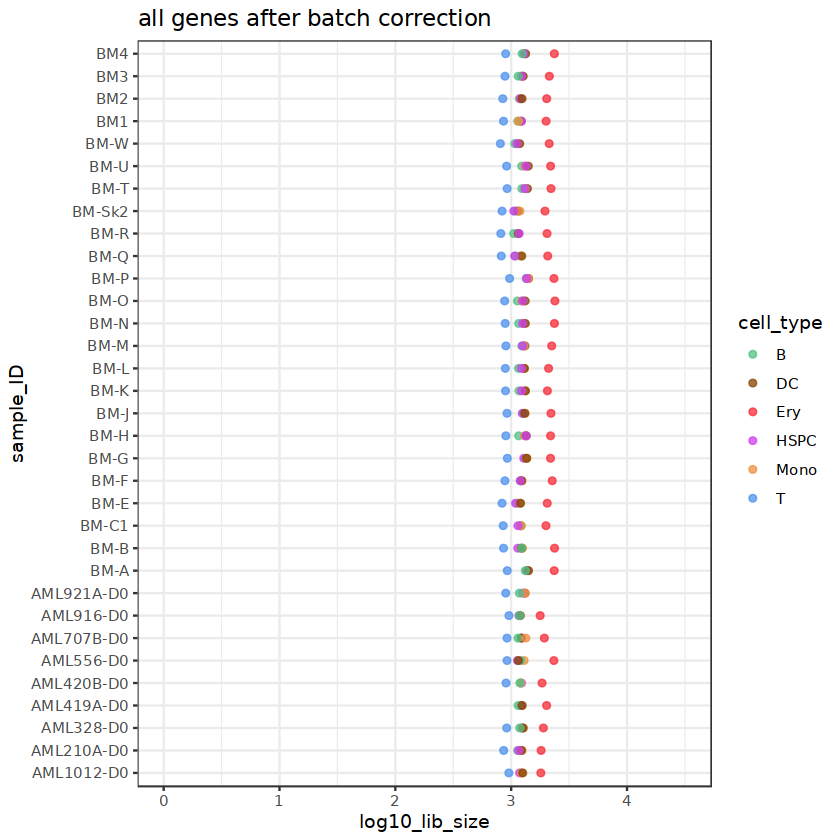

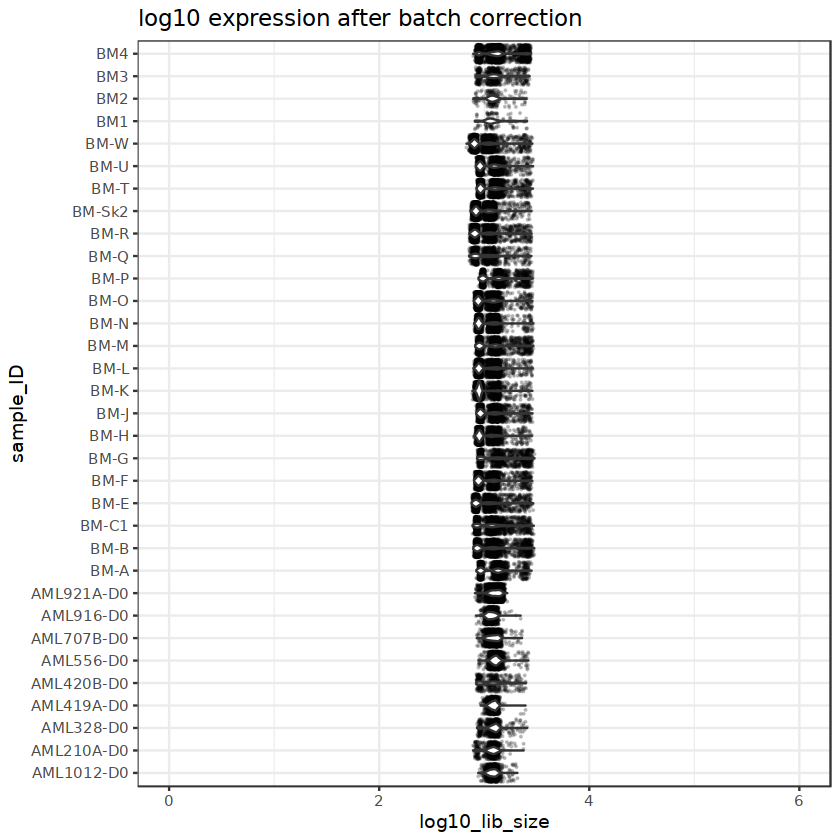

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  1.69 1.8 1.68 1.9 1.75 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


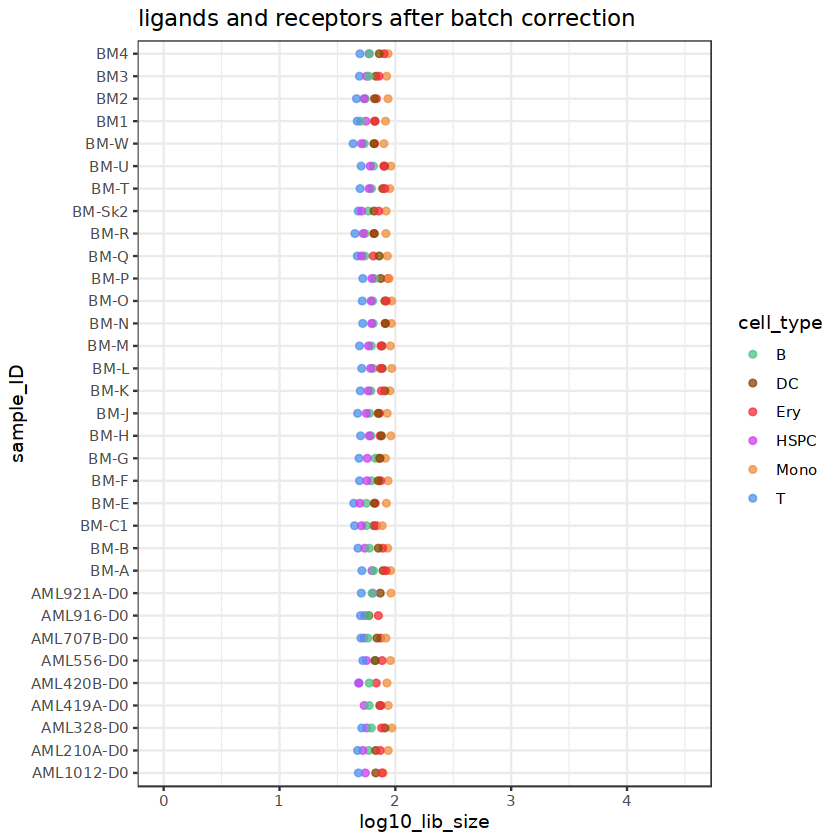

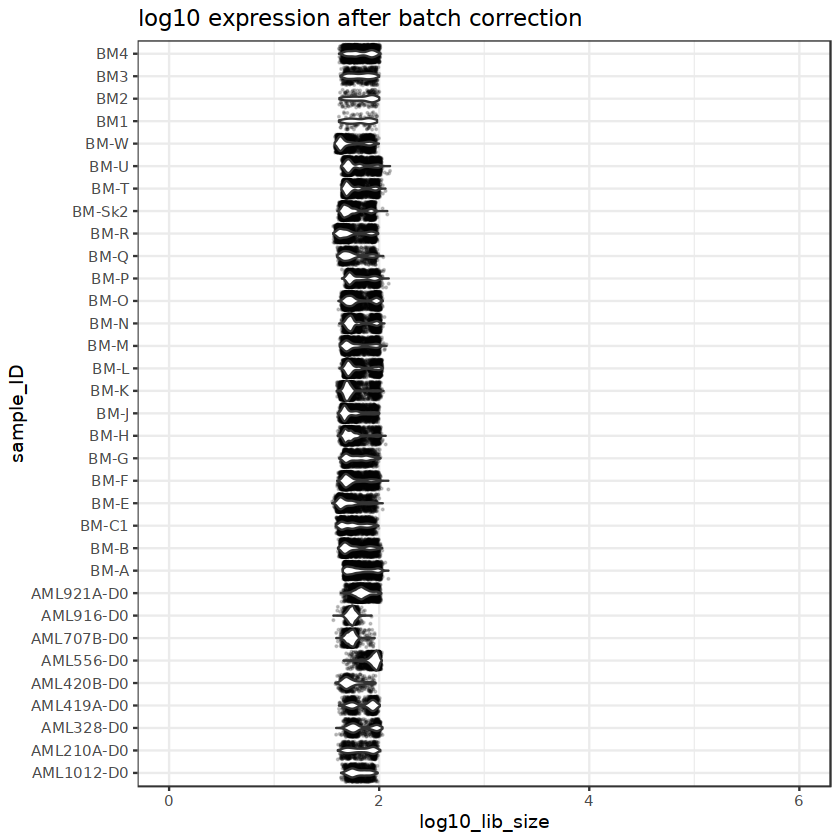

In [10]:
# visualize expression in pseudo sorted bulk

  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes))
           ,idx_genes <- anno_genes$isLigand | anno_genes$isReceptor
    )

    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub(".*_"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )

    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,"after batch correction")) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )

    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(counts_corrected[idx_genes,]) +1)
                     ,sample_ID = anno_cells$sample_ID
    )
    print(str(df))

    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() +
      ggtitle("log10 expression after batch correction") +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)

  }


In [13]:
getwd()

[1] "/work/project/ladcol_011/MariaWF/community-paper/preprocessing"